# Meta-Analysis for Placental mQTLs
I will be using the [MeCS](https://cnsgenomics.com/software/smr/#MeCS) method/software to conduct fixed-effect meta-analysis in (potentially) correlated samples for both marginal and sex-biased effects.

## Formatting `besd` files
I need to remove some duplicates in the summary statistics files:

In [8]:
%%bash 
files=( "$HOME/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all.txt" "$HOME/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction.txt" "$HOME/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all.txt" "$HOME/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction.txt" )
for f in ${files[@]}; do
    awk -F '\t' '!seen[$1,$2]++' $f > "${f%.*}"_dedup.txt &
done
wait

In [1]:
%%bash
# First load environment
source ~/.bashrc

# Marginal
smr_Linux --eqtl-summary ~/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_dedup.txt \
    --matrix-eqtl-format \
    --make-besd\
    --out ../data/delahaye_marginal &
smr_Linux --eqtl-summary ~/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_dedup.txt\
    --matrix-eqtl-format\
    --make-besd\
    --out ../data/RICHS_marginal &

# Sex interaction
smr_Linux --eqtl-summary ~/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction_dedup.txt\
    --matrix-eqtl-format \
    --make-besd\
    --out ../data/delahaye_sex_interaction &
smr_Linux --eqtl-summary ~/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction_dedup.txt\
    --matrix-eqtl-format\
    --make-besd\
    --out ../data/RICHS_sex_interaction 

wait

*******************************************************************
*******************************************************************
*******************************************************************
* Summary-data-based Mendelian Randomization (SMR)
*******************************************************************
* Summary-data-based Mendelian Randomization (SMR)
* Summary-data-based Mendelian Randomization (SMR)
* version 1.03
* Summary-data-based Mendelian Randomization (SMR)
* version 1.03
* version 1.03
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* version 1.03
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* The University of Queensland
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* The University of Queensland
* The University of Queensland
* MIT License
* The University of Queensland
* MIT License
* MIT License
*******************************************************************
* MIT License
****************

bash: line 22: 41376 Killed                  smr_Linux --eqtl-summary ~/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction_dedup.txt --matrix-eqtl-format --make-besd --out ../data/RICHS_sex_interaction
bash: line 24: 41373 Killed                  smr_Linux --eqtl-summary ~/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_dedup.txt --matrix-eqtl-format --make-besd --out ../data/delahaye_marginal


These files need to be updated to include coordinates and alleles:

In [9]:
import pandas as pd
from IPython.display import display

mqtl_annotation = pd.read_csv("../../450k_annotation.csv")
delahaye_pos = pd.read_csv("../../delahaye_QC/matrix_eqtl_data/snp_pos.txt", sep=r"\s+")
snp_data_delahaye = pd.read_csv(
    "../../delahaye_QC/placenta_regulatory_landscape/RootStudyConsentSet_phs001717.PlacentalRegulation.v1.p1.c1.HMB-IRB-PUB-COL-MDS/genotype_qc/all_imputed_r2_30_rsid.afreq",
    dtype={"#CHROM": str},
    sep="\t",
).merge(delahaye_pos, left_on="ID", right_on="SNP")
richs_pos = pd.read_csv("../../RICHS_QC/matrix_eqtl_data/snp_pos.txt", sep=r"\s+")
snp_data_richs = pd.read_csv(
    "../../RICHS_genotyping/phg001102.v1.RICHS.genotype-calls-matrixfmt.MEGA_Consortium.c1.GRU/all_imputed_r2_30_rsid.afreq",
    dtype={"#CHROM": str},
    sep="\t",
).merge(richs_pos, left_on="ID", right_on="SNP")

# Show data headers
display(mqtl_annotation.head())
display(snp_data_delahaye.head())

# generate esi formats: chr# snp cM/0 BP. REF ALT FREQ
esi_delahaye = pd.read_csv("../data/delahaye_marginal.esi", sep=r"\s+", header=None)
esi_richs = pd.read_csv("../data/RICHS_marginal.esi", sep=r"\s+", header=None)

esi_delahaye.merge(snp_data_delahaye, left_on=1, right_on="ID").to_csv(
    "../data/delahaye_esi_update.esi",
    index=False,
    header=None,
    sep="\t",
    columns=["#CHROM", "ID", 2, "POS", "REF", "ALT", "ALT_FREQS"],
)
esi_richs.merge(snp_data_richs, left_on=1, right_on="ID").to_csv(
    "../data/richs_esi_update.esi",
    index=False,
    header=None,
    sep="\t",
    columns=["#CHROM", "ID", 2, "POS", "REF", "ALT", "ALT_FREQS"],
)

/home/wcasazza/miniconda3/envs/big_data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,chr,pos,strand,Name,AddressA,AddressB,ProbeSeqA,ProbeSeqB,Type,...,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_RefGene_Group,Phantom,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS
0,cg00050873,chrY,9363356,-,cg00050873,32735311,31717405.0,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,...,TSPY4;FAM197Y2,NM_001164471;NR_001553,Body;TSS1500,NaN,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN
1,cg00212031,chrY,21239348,-,cg00212031,29674443,38703326.0,CCCAATTAACCACAAAAACTAAACAAATTATACAATCAAAAAAACA...,CCCAATTAACCGCAAAAACTAAACAAATTATACGATCGAAAAAACG...,I,...,TTTY14,NR_001543,TSS200,NaN,NaN,NaN,Y:19697854-19699393,NaN,NaN,NaN
2,cg00213748,chrY,8148233,-,cg00213748,30703409,36767301.0,TTTTAACACCTAACACCATTTTAACAATAAAAATTCTACAAAAAAA...,TTTTAACGCCTAACACCGTTTTAACGATAAAAATTCTACAAAAAAA...,I,...,NaN,NaN,NaN,NaN,NaN,NaN,Y:8207555-8208234,NaN,NaN,NaN
3,cg00214611,chrY,15815688,-,cg00214611,69792329,46723459.0,CTAACTTCCAAACCACACTTTATATACTAAACTACAATATAACACA...,CTAACTTCCGAACCGCGCTTTATATACTAAACTACAATATAACGCG...,I,...,TMSB4Y;TMSB4Y,NM_004202;NM_004202,1stExon;5'UTR,NaN,NaN,NaN,Y:14324883-14325218,Y:15815422-15815706,Promoter_Associated_Cell_type_specific,NaN
4,cg00455876,chrY,9385539,-,cg00455876,27653438,69732350.0,AACTCTAAACTACCCAACACAAACTCCAAAAACTTCTCAAAAAAAA...,AACTCTAAACTACCCGACACAAACTCCAAAAACTTCTCGAAAAAAA...,I,...,NaN,NaN,NaN,NaN,NaN,NaN,Y:9993394-9995882,NaN,NaN,NaN


,#CHROM,ID,REF,ALT,ALT_FREQS,OBS_CT,SNP,CHR,POS
0,1,rs192898053,T,C,0.000949,554,rs192898053,chr1,77470
1,1,rs533785935,C,T,0.000968,554,rs533785935,chr1,87838
2,1,rs549482313,C,T,0.000968,554,rs549482313,chr1,87839
3,1,rs201475892,C,T,0.019505,554,rs201475892,chr1,534247
4,1,rs564392300,G,A,0.000731,554,rs564392300,chr1,724567


In [25]:
# generate epi formats: chr# probe cM/0 BP another_id strand
epi_delahaye = pd.read_csv("../data/delahaye_marginal.epi", sep=r"\s+", header=None)
epi_richs = pd.read_csv("../data/RICHS_marginal.epi", sep=r"\s+", header=None)
mqtl_annotation.chr = mqtl_annotation.chr.str.replace("chr", "")
display(epi_delahaye.head())
display(mqtl_annotation)
epi_delahaye.merge(mqtl_annotation, left_on=1, right_on="Name").to_csv(
    "../data/delahaye_epi_update.epi",
    index=False,
    header=None,
    sep="\t",
    columns=["chr", "Name", 2, "pos", "Name", "strand"],
)
epi_richs.merge(mqtl_annotation, left_on=1, right_on="Name").to_csv(
    "../data/richs_epi_update.epi",
    index=False,
    header=None,
    sep="\t",
    columns=["chr", "Name", 2, "pos", "Name", "strand"],
)

,0,1,2,3,4,5
0,NaN,cg19311470,0,NaN,NaN,NaN
1,NaN,cg14859874,0,NaN,NaN,NaN
2,NaN,cg23367851,0,NaN,NaN,NaN
3,NaN,cg09084244,0,NaN,NaN,NaN
4,NaN,cg01081438,0,NaN,NaN,NaN


,Unnamed: 0,chr,pos,strand,Name,AddressA,AddressB,ProbeSeqA,ProbeSeqB,Type,...,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_RefGene_Group,Phantom,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS
0,cg00050873,Y,9363356,-,cg00050873,32735311,31717405.0,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,...,TSPY4;FAM197Y2,NM_001164471;NR_001553,Body;TSS1500,NaN,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN
1,cg00212031,Y,21239348,-,cg00212031,29674443,38703326.0,CCCAATTAACCACAAAAACTAAACAAATTATACAATCAAAAAAACA...,CCCAATTAACCGCAAAAACTAAACAAATTATACGATCGAAAAAACG...,I,...,TTTY14,NR_001543,TSS200,NaN,NaN,NaN,Y:19697854-19699393,NaN,NaN,NaN
2,cg00213748,Y,8148233,-,cg00213748,30703409,36767301.0,TTTTAACACCTAACACCATTTTAACAATAAAAATTCTACAAAAAAA...,TTTTAACGCCTAACACCGTTTTAACGATAAAAATTCTACAAAAAAA...,I,...,NaN,NaN,NaN,NaN,NaN,NaN,Y:8207555-8208234,NaN,NaN,NaN
3,cg00214611,Y,15815688,-,cg00214611,69792329,46723459.0,CTAACTTCCAAACCACACTTTATATACTAAACTACAATATAACACA...,CTAACTTCCGAACCGCGCTTTATATACTAAACTACAATATAACGCG...,I,...,TMSB4Y;TMSB4Y,NM_004202;NM_004202,1stExon;5'UTR,NaN,NaN,NaN,Y:14324883-14325218,Y:15815422-15815706,Promoter_Associated_Cell_type_specific,NaN
4,cg00455876,Y,9385539,-,cg00455876,27653438,69732350.0,AACTCTAAACTACCCAACACAAACTCCAAAAACTTCTCAAAAAAAA...,AACTCTAAACTACCCGACACAAACTCCAAAAACTTCTCGAAAAAAA...,I,...,NaN,NaN,NaN,NaN,NaN,NaN,Y:9993394-9995882,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485507,ch.22.909671F,22,46114168,+,ch.22.909671F,47797398,NaN,GCACCACTTACACACAAAAACATTTCTTTTCAATAAATTTTTAATT...,NaN,II,...,ATXN10;ATXN10,NM_001167621;NM_013236,Body;Body,NaN,NaN,True,NaN,NaN,NaN,NaN
485508,ch.22.46830341F,22,48451677,+,ch.22.46830341F,29618504,NaN,GAAAAAATAAAAACCATTCTCTAAACAAAATACCTTCTACATATAA...,NaN,II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485509,ch.22.1008279F,22,48731367,+,ch.22.1008279F,49664383,NaN,CCCCTACAATCTTCCTAAACCTAAAACTAAATCTATATTAAATAAA...,NaN,II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485510,ch.22.47579720R,22,49193714,+,ch.22.47579720R,53733426,NaN,CCTCTCTCCAACTTCTAAAATTTACTAATAATCTCTAAAACCCCTT...,NaN,II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
%%bash
# First load environment
source ~/.bashrc

smr_Linux --beqtl-summary ../data/RICHS_sex_interaction --update-esi ../data/richs_esi_update.esi
smr_Linux --beqtl-summary ../data/RICHS_sex_interaction --update-epi ../data/richs_epi_update.epi
smr_Linux --beqtl-summary ../data/RICHS_marginal --update-esi ../data/richs_esi_update.esi
smr_Linux --beqtl-summary ../data/RICHS_marginal --update-epi ../data/richs_epi_update.epi

smr_Linux --beqtl-summary ../data/delahaye_sex_interaction --update-esi ../data/delahaye_esi_update.esi
smr_Linux --beqtl-summary ../data/delahaye_sex_interaction --update-epi ../data/delahaye_epi_update.epi
smr_Linux --beqtl-summary ../data/delahaye_marginal --update-esi ../data/delahaye_esi_update.esi
smr_Linux --beqtl-summary ../data/delahaye_marginal --update-epi ../data/delahaye_epi_update.epi


*******************************************************************
* Summary-data-based Mendelian Randomization (SMR)
* version 1.03
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* The University of Queensland
* MIT License
*******************************************************************
Analysis started: 23:5:27,Tue Apr 6,2021

Options:
--beqtl-summary ../data/RICHS_sex_interaction
--update-esi ../data/richs_esi_update.esi

Reading eQTL SNP information from [../data/RICHS_sex_interaction.esi].
5483835 SNPs to be included from [../data/RICHS_sex_interaction.esi].

Generating the .esi file...
5483835 SNPs have been saved in the file ../data/RICHS_sex_interaction.bak.esi.

Generating the .esi file...
5483835 SNPs have been saved in the file ../data/RICHS_sex_interaction.esi.
5483847 of 5483835 SNPs are updated.

Analysis completed: 23:6:14,Tue Apr 6,2021
Computational time: 0:0:47
*******************************************************************
* Summary-data-based Mendelian R

## Running Meta analysis

In [ ]:
%%bash
# First load environment
source ~/.bashrc
echo "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/delahaye_sex_interaction" > "../data/besd.list"
echo "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/RICHS_sex_interaction" >> "../data/besd.list"
smr_Linux --besd-flist "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/besd.list"\
    --mecs\
    --thread-num 16 \
    --out "../data/delahaye_richs_sex_interaction_mecs"

echo "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/delahaye_marginal" > "../data/besd.list"
echo "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/RICHS_marginal" >> "../data/besd.list"
smr_Linux --besd-flist "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/besd.list"\
    --mecs\
    --thread-num 16\
    --out "../data/delahaye_richs_marginal_mecs"

## Investigating output

In [1]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests

%load_ext rpy2.ipython
%R library(tidyverse)
%R library(ggpubr)
%R library(GGally)
%R library(data.table)
%R library(ggsci)
%Rdevice png

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

R[write to console]: data.table 1.12.2 using 8 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘data.table’


R[write to console]: The following objects are masked from ‘package:dplyr’:

    between, first, last


R[write to console]: The following object is masked from ‘package:purrr’:

    transpose




In [2]:
marginal = dd.read_csv("../data/delahaye_richs_marginal_mecs.txt", sep=r"\s+")
sex_interaction = dd.read_csv(
    "../data/delahaye_richs_sex_interaction_mecs.txt", sep=r"\s+"
)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/delahaye_richs_marginal_mecs.txt'

In [ ]:
marginal_fdr = multipletests(marginal.p, method="fdr_bh")
sex_interaction_fdr = multipletests(sex_interaction.p, method="fdr_bh")

marginal.set_index("p")
sex_interaction.set_index("p")

In [ ]:
marginal_sig = marginal[marginal.p < marginal_fdr[3]].compute()
sex_interaction_sig = sex_interaction[
    sex_interaction.p < sex_interaction_fdr[3]
].compute()

marginal_sig["FDR"] = pd.Series(marginal_fdr[1][marginal_fdr[0]])
sex_interaction_sig["FDR"] = pd.Series(sex_interaction_fdr[1][sex_interaction_fdr[0]])

marginal_sig[(marginal_sig["Freq"] >= 0.05) & (marginal_sig["Freq"] <= 0.95)].to_csv(
    "../data/delahaye_richs_marginal_mecs_sig.txt", sep="\t", index=False
)
sex_interaction_sig[
    (sex_interaction_sig["Freq"] >= 0.05) & (sex_interaction_sig["Freq"] <= 0.95)
].to_csv("../data/delahaye_richs_sex_interaction_mecs_sig.txt", sep="\t", index=False)

In [ ]:
if not "marginal_sig" in vars():
    marginal_sig = pd.read_csv("../data/delahaye_richs_marginal_mecs_sig.txt", sep="\t")
    marginal_sig[
        (marginal_sig["Freq"] >= 0.05) & (marginal_sig["Freq"] <= 0.95)
    ].to_csv("../data/delahaye_richs_marginal_mecs_sig.txt", sep="\t", index=False)
if not "sex_interaction_sig" in vars():
    sex_interaction_sig = pd.read_csv(
        "../data/delahaye_richs_sex_interaction_mecs_sig.txt", sep="\t"
    )
    sex_interaction_sig[
        (sex_interaction_sig["Freq"] >= 0.05) & (sex_interaction_sig["Freq"] <= 0.95)
    ].to_csv(
        "../data/delahaye_richs_sex_interaction_mecs_sig.txt", sep="\t", index=False
    )
annotation = pd.read_csv("/scratch/st-dennisjk-1/wcasazza/450k_annotation.csv")
marginal_sig_annot = marginal_sig.merge(annotation, left_on="Probe", right_on="Name")
marginal_sig_annot.to_csv(
    "../data/marginal_meta_annotated_hits.txt.gz", sep="\t", index=False
)
sex_interaction_sig_annot = sex_interaction_sig.merge(
    annotation, left_on="Probe", right_on="Name"
)
sex_interaction_sig_annot.to_csv(
    "../data/sex_interaction_meta_annotated_hits.txt.gz", sep="\t", index=False
)
sex_interaction_sig.hist("p")
marginal_sig.hist("p")

In [ ]:
sex_interaction_sig[
    (sex_interaction_sig["Freq"] >= 0.05) & (sex_interaction_sig["Freq"] <= 0.95)
]

In [ ]:
marginal_sig[(marginal_sig["Freq"] >= 0.05) & (marginal_sig["Freq"] <= 0.95)]

In [2]:
male = dd.read_csv("../data/delahaye_richs_male_mecs.txt.gz", sep=r"\s+")
male_fdr = multipletests(male.p, method="fdr_bh")
male.set_index("p")
male_sig = male[male.p < male_fdr[3]].compute()
male_sig["FDR"] = pd.Series(male_fdr[1][male_fdr[0]])
male_sig.to_csv("../data/delahaye_richs_male_mecs_sig.txt", sep="\t", index=False)
male_sig[(male_sig["Freq"] >= 0.05) & (male_sig["Freq"] <= 0.95)].to_csv(
    "../data/delahaye_richs_male_mecs_sig.txt", sep="\t", index=False
)
female = dd.read_csv("../data/delahaye_richs_female_mecs.txt.gz", sep=r"\s+")
female_fdr = multipletests(female.p, method="fdr_bh")
female.set_index("p")
female_sig = female[female.p < female_fdr[3]].compute()
female_sig["FDR"] = pd.Series(female_fdr[1][female_fdr[0]])
female_sig[(female_sig["Freq"] >= 0.05) & (female_sig["Freq"] <= 0.95)].to_csv(
    "../data/delahaye_richs_female_mecs_sig.txt", sep="\t", index=False
)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/delahaye_richs_male_mecs.txt.'

Now to annotate these hits:

In [3]:
if not "male_sig" in vars():
    male_sig = pd.read_csv("../data/delahaye_richs_male_mecs_sig.txt", sep="\t")
    male_sig[(male_sig["Freq"] >= 0.05) & (male_sig["Freq"] <= 0.95)].to_csv(
        "../data/delahaye_richs_male_mecs_sig.txt", sep="\t", index=False
    )
if not "female_sig" in vars():
    female_sig = pd.read_csv("../data/delahaye_richs_female_mecs_sig.txt", sep="\t")
    female_sig[(female_sig["Freq"] >= 0.05) & (female_sig["Freq"] <= 0.95)].to_csv(
        "../data/delahaye_richs_female_mecs_sig.txt", sep="\t", index=False
    )
annotation = pd.read_csv("/scratch/st-dennisjk-1/wcasazza/450k_annotation.csv")
male_sig_annot = male_sig.merge(annotation, left_on="Probe", right_on="Name")
male_sig_annot.to_csv("../data/male_meta_annotated_hits.txt.gz", sep="\t", index=False)
female_sig_annot = female_sig.merge(annotation, left_on="Probe", right_on="Name")
female_sig_annot.to_csv(
    "../data/female_meta_annbotated_hits.txt.gz", sep="\t", index=False
)

/home/wcasazza/miniconda3/envs/big_data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Performing SNP and CpG based analyses on meta-analyzed mQTLs
there are a few experiments performed in the Delahaye data that I expect to be different in the meta-analyzed data due to the reduced number of mQTLs. The sex biased mQTLs may or may not change in a major way in terms of their snp and CpG level enrichments, as the number of hits was fairly stable.
These are the experiments to run:
1. counting male and female specific hits per chromosome
1. breakdown of CpG sites by their position relative to CGIs
1. GARFIELD (enrichment was run elsewhere, but plotted here)

In [3]:
male_sig_annot = pd.read_csv("../data/male_meta_annotated_hits.txt", sep="\t")
female_sig_annot = pd.read_csv("../data/female_meta_annotated_hits.txt", sep="\t")
marginal_sig_annot = pd.read_csv(
    "../data/marginal_meta_annotated_hits.txt.gz", sep="\t"
)
sex_interaction_sig_annot = pd.read_csv(
    "../data/sex_interaction_meta_annotated_hits.txt.gz", sep="\t"
)

/home/wcasazza/miniconda3/envs/big_data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (37,38,42,43,44,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/wcasazza/miniconda3/envs/big_data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (37,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
male = dd.read_csv("../data/delahaye_richs_male_mecs.txt", sep=r"\s+")
female = dd.read_csv("../data/delahaye_richs_female_mecs.txt", sep=r"\s+")
male = (
    male[male.Probe.isin(sex_interaction_sig_annot.Probe)]
    .compute()
    .reset_index()
    .set_index(["SNP", "Probe"])
)
female = (
    female[female.Probe.isin(sex_interaction_sig_annot.Probe)]
    .compute()
    .reset_index()
    .set_index(["SNP", "Probe"])
)
sex_tmp = sex_interaction_sig_annot.set_index(["SNP", "Probe"])
male_effect_interaction = male.reindex(sex_tmp.index).dropna(how="all").reset_index()
female_effect_interaction = (
    female.reindex(sex_tmp.index).dropna(how="all").reset_index()
)

male_effect_interaction.to_csv(
    "../data/delahaye_richs_male_effect_interaction.txt", sep="\t"
)
female_effect_interaction.to_csv(
    "../data/delahaye_richs_female_effect_interaction.txt", sep="\t"
)

### Counting male and female specific hits per chromosome

In [4]:
male_effect_interaction = pd.read_csv(
    "../data/delahaye_richs_male_effect_interaction.txt", sep="\t"
)
female_effect_interaction = pd.read_csv(
    "../data/delahaye_richs_female_effect_interaction.txt", sep="\t"
)
sex_merge = sex_interaction_sig_annot.set_index(["SNP", "Probe"])
male_merge = male_sig_annot.set_index(["SNP", "Probe"])
female_merge = female_sig_annot.set_index(["SNP", "Probe"])
male_spec = male_merge.reindex(sex_merge.index).dropna(how="all").reset_index()
female_spec = female_merge.reindex(sex_merge.index).dropna(how="all").reset_index()
male_count = male_spec.groupby("Chr").size().reset_index()
female_count = female_spec.groupby("Chr").size().reset_index()
male_count.columns = ["Chr", "mQTLs"]
male_count.mQTLs = -male_count.mQTLs
female_count.columns = ["Chr", "mQTLs"]
female_effects = female_spec[["SNP", "Probe", "Chr", "b", "SE", "Relation_to_Island"]]
male_effects = male_spec[["SNP", "Probe", "Chr", "b", "SE", "Relation_to_Island"]]
marginal_effects = marginal_sig_annot[
    ["SNP", "Probe", "Chr", "b", "SE", "Relation_to_Island"]
]
sex_effects = sex_interaction_sig_annot[
    ["SNP", "Probe", "Chr", "b", "SE", "Relation_to_Island"]
]

female_cpg = female_spec[
    ["SNP", "Probe", "Chr", "b", "SE", "Relation_to_Island"]
].drop_duplicates("Probe")
male_cpg = male_spec[
    ["SNP", "Probe", "Chr", "b", "SE", "Relation_to_Island"]
].drop_duplicates("Probe")
marginal_cpg = marginal_sig_annot[
    ["SNP", "Probe", "Chr", "b", "SE", "Relation_to_Island"]
].drop_duplicates("Probe")
sex_cpg = sex_interaction_sig_annot[
    ["SNP", "Probe", "Chr", "b", "SE", "Relation_to_Island"]
].drop_duplicates("Probe")

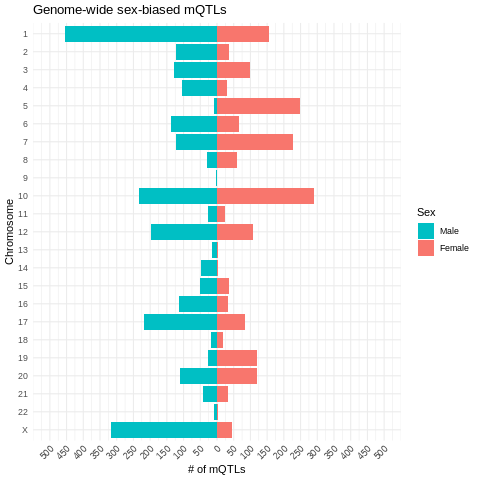

In [5]:
%%R -i male_count -i female_count

male_count$Sex <- "Male"
female_count$Sex <- "Female"
to_plot <- rbind(female_count,male_count)
to_plot$Sex <- factor(to_plot$Sex, levels = c("Male","Female"))
to_plot$Chr <- as.character(to_plot$Chr)
to_plot$Chr <- ifelse(to_plot$Chr == "23", "X",to_plot$Chr )
to_plot$Chr <- factor(to_plot$Chr,levels = rev(c(as.character(1:22),"X")))
ggplot(to_plot,aes(Chr,mQTLs,fill = Sex)) + 
    geom_bar(stat="identity",position="identity") +
    coord_flip() +
    scale_y_continuous(breaks=seq(-500, 500, 50),labels=as.character(c(seq(500,0,-50),seq(50,500,50))),limits=c(-500,500))+
    theme_minimal() +
    scale_fill_manual(values = c("#00bfc4","#f8766d"))+
    labs(y="# of mQTLs",x = "Chromosome") +
    ggtitle("Genome-wide sex-biased mQTLs") +
    theme(axis.text.x = element_text(angle=45,hjust=1,vjust=1))


[1] TRUE
[1] TRUE

	Wilcoxon rank sum test with continuity correction

data:  male_effects$b and female_effects$b
W = 343668786, p-value = 1
alternative hypothesis: true location shift is less than 0

[1] 0.00434053
[1] 0.002759901

	Wilcoxon rank sum test with continuity correction

data:  abs(male_effects$b) and abs(female_effects$b)
W = 331405298, p-value = 0.2469
alternative hypothesis: true location shift is less than 0

[1] 0.02638027
[1] 0.01975735

	Wilcoxon rank sum test with continuity correction

data:  abs(to_plot$b[to_plot$Sex == "Male"]) and abs(to_plot$b[to_plot$Sex == "Female"])
W = 306172342, p-value = 0.07155
alternative hypothesis: true location shift is less than 0

[1] 0.02386758
[1] 0.01905598

	Spearman's rank correlation rho

data:  male_effects$b and female_effects$b
S = 2.5716e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1005181 

[1] 0.04760499
[1] 0.009582324
[1] 9.134411e-27

	Spearman's rank corre

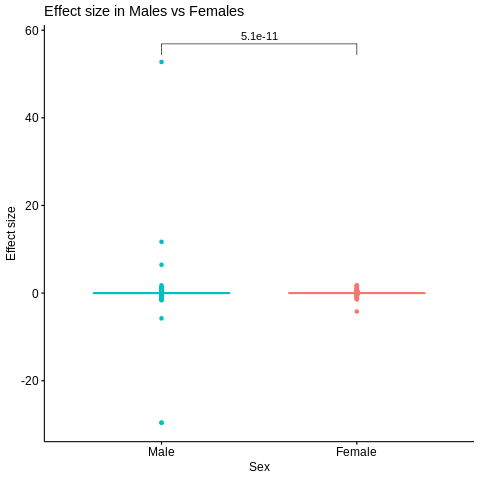

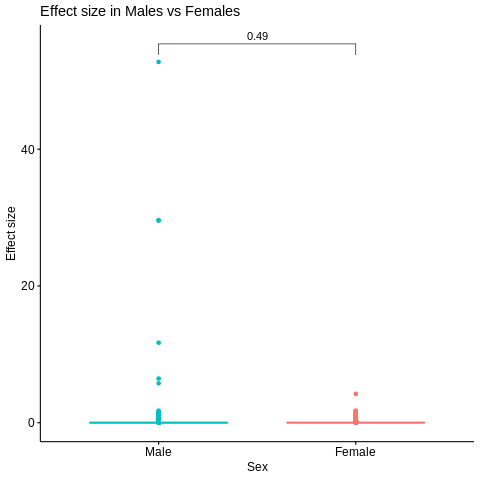

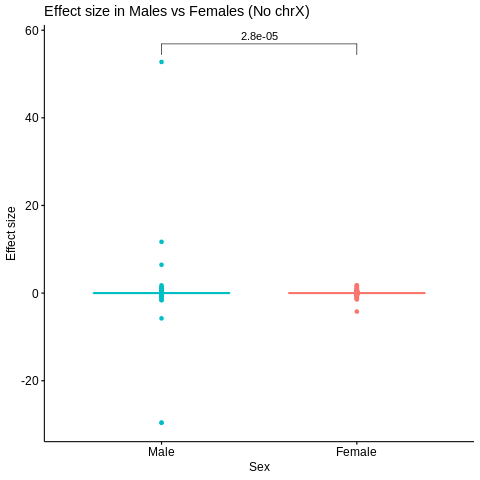

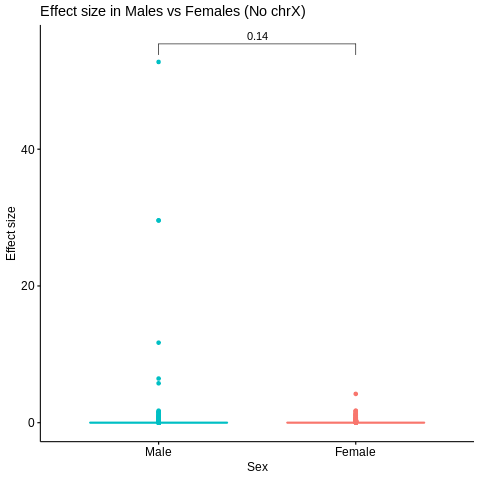

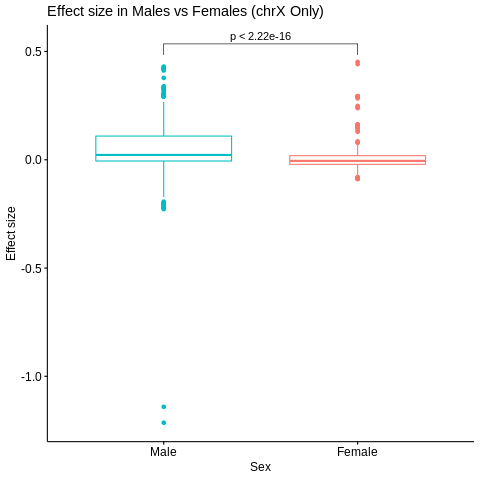

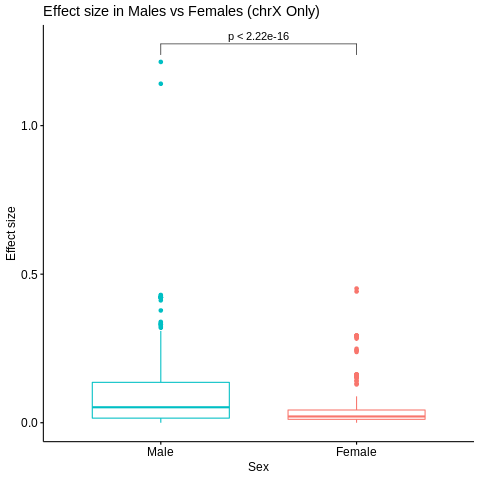

In [20]:
%%R -i female_effect_interaction -i male_effect_interaction
male_effects <- male_effect_interaction[male_effect_interaction$SNP %in% female_effect_interaction$SNP & male_effect_interaction$Probe %in% female_effect_interaction$Probe,] # stratified meta effects with significant interaction
female_effects <- female_effect_interaction[female_effect_interaction$SNP %in% male_effect_interaction$SNP & female_effect_interaction$Probe %in% male_effect_interaction$Probe,] # stratified meta effects with significant interaction
print(all(male_effects$SNP == female_effects$SNP))
print(all(male_effects$Probe == female_effects$Probe))
female_effects$Sex <- "Female"
male_effects$Sex <- "Male"
to_plot <- rbind(female_effects,male_effects)

to_plot$Sex <- factor(to_plot$Sex, levels = c("Male","Female"))

p1 <- ggboxplot(to_plot, x = "Sex", y = "b",color="Sex") +
    stat_compare_means(comparisons=list(c("Female","Male")),method="wilcox.test") +
    labs(y = "Effect size") +
    guides(color=FALSE)+
    ggtitle("Effect size in Males vs Females") +
    scale_colour_manual(values=c("#00bfc4","#f8766d"))
print(p1) 
print(wilcox.test(male_effects$b,female_effects$b, alternative= "less"))
print(mean(male_effects$b))
print(mean(female_effects$b))
print(wilcox.test(abs(male_effects$b),abs(female_effects$b), alternative= "less"))
print(mean(abs(male_effects$b)))
print(mean((abs(female_effects$b))))
to_plot_original <- to_plot
to_plot <- to_plot %>% filter(Chr != 23)
print(wilcox.test(abs(to_plot$b[to_plot$Sex == "Male"]),abs(to_plot$b[to_plot$Sex=="Female"]), alternative= "less"))
print(mean(abs(to_plot$b[to_plot$Sex == "Male"])))
print(mean((abs(to_plot$b[to_plot$Sex == "Female"]))))
print(cor.test(male_effects$b,female_effects$b,method="spearman"))
p2 <- ggboxplot(to_plot_original %>% mutate(b=abs(b)), x = "Sex", y = "b",color="Sex") +
    stat_compare_means(comparisons=list(c("Female","Male"))) +
    labs(y = "Effect size") +
    guides(color=FALSE)+
    ggtitle("Effect size in Males vs Females") +
    scale_colour_manual(values=c("#00bfc4","#f8766d"))
print(p2) 




p1 <- ggboxplot(to_plot_original %>% filter(Chr != 23), x = "Sex", y = "b",color="Sex") +
    stat_compare_means(comparisons=list(c("Female","Male"))) +
    labs(y = "Effect size") +
    guides(color=FALSE)+
    ggtitle("Effect size in Males vs Females (No chrX)") +
    scale_colour_manual(values=c("#00bfc4","#f8766d"))
print(p1) 

p2 <- ggboxplot(to_plot_original %>% filter(Chr != 23) %>% mutate(b=abs(b)), x = "Sex", y = "b",color="Sex") +
    stat_compare_means(comparisons=list(c("Female","Male"))) +
    labs(y = "Effect size") +
    guides(color=FALSE)+
    ggtitle("Effect size in Males vs Females (No chrX)") +
    scale_colour_manual(values=c("#00bfc4","#f8766d"))
print(p2) 

p1 <- ggboxplot(to_plot_original %>% filter(Chr == 23), x = "Sex", y = "b",color="Sex") +
    stat_compare_means(comparisons=list(c("Female","Male"))) +
    labs(y = "Effect size") +
    guides(color=FALSE)+
    ggtitle("Effect size in Males vs Females (chrX Only)") +
    scale_colour_manual(values=c("#00bfc4","#f8766d"))
print(p1) 

p2 <- ggboxplot(to_plot_original %>% filter(Chr == 23) %>% mutate(b=abs(b)), x = "Sex", y = "b",color="Sex") +
    stat_compare_means(comparisons=list(c("Female","Male"))) +
    labs(y = "Effect size") +
    guides(color=FALSE)+
    ggtitle("Effect size in Males vs Females (chrX Only)") +
    scale_colour_manual(values=c("#00bfc4","#f8766d"))
print(p2) 
x_only <- to_plot_original %>% filter(Chr == 23)
print(mean(x_only$b[x_only$Sex == "Male"]))
print(mean(x_only$b[x_only$Sex == "Female"]))
print(wilcox.test(x_only$b[x_only$Sex == "Male"],x_only$b[x_only$Sex == "Female"],alternative="greater")$p.value)
print(cor.test(male_effects[male_effects$Chr == 23,]$b,female_effects[female_effects$Chr == 23,]$b,method="spearman"))
print(cor.test(male_effects[male_effects$Chr != 23,]$b,female_effects[female_effects$Chr != 23,]$b,method="spearman"))

### Overlap in male and female specific hits and correlation in effects

In [7]:
# Modify input dataframes
male_merge_df = (
    male_merge.reset_index()
    .loc[male_merge.reset_index()["FDR"] < 0.05, "SNP":"Probe_bp"]
    .drop_duplicates(subset="Probe")
)
female_merge_df = (
    female_merge.reset_index()
    .loc[female_merge.reset_index()["FDR"] < 0.05, "SNP":"Probe_bp"]
    .drop_duplicates(subset="Probe")
)
male_spec_df = male_spec.loc[
    male_spec.reset_index()["FDR"] < 0.05, "SNP":"Probe_bp"
].drop_duplicates(subset="Probe")
female_spec_df = female_spec.loc[
    female_spec.reset_index()["FDR"] < 0.05, "SNP":"Probe_bp"
].drop_duplicates(subset="Probe")
female_spec_df.head()

,SNP,Probe,Chr,BP,A1,A2,Freq,Probe_Chr,Probe_bp
0,rs72857306,cg06177107,1.0,3557274.0,G,C,0.093750,1.0,3551901.0
1,rs72640028,cg24579970,1.0,7110733.0,T,C,0.101562,1.0,7123315.0
2,rs2495082,cg18150460,1.0,14157986.0,G,A,0.199219,1.0,14109904.0
3,rs905390,cg13299927,1.0,18018255.0,A,C,0.757812,1.0,18019701.0
4,rs1473688,cg18756931,1.0,20087406.0,A,G,0.312500,1.0,20095795.0


In [8]:
%%R -i male_merge_df -i male_spec_df -i female_merge_df -i female_spec_df
library(VennDiagram)
venn.diagram(
  x = list(
    unique(male_merge_df$Probe), 
    unique(male_spec_df$Probe),
    unique(female_merge_df$Probe),
    unique(female_spec_df$Probe)
    ),
  category.names = c("Effect in Males" , "Unique Effect in Males","Effect in Females" , "Unique Effect in Females"),
  filename = 'cpg_overlap_meta_analysis_male_female.png',
  output = TRUE ,
          imagetype="png" ,
          height = 480 ,
          width = 480 ,
          resolution = 300,
          compression = "lzw",
          lwd = 1,
          col=c("#eea2adff", '#8b5f65ff',"#bcd2eeff", '#6e7b8bff'),
          fill = c(alpha("#eea2adff",0.3), alpha('#8b5f65ff',0.3),alpha("#bcd2eeff",0.3), alpha('#6e7b8bff',0.3)),
          cex = 0.5,
          fontfamily = "sans",
          cat.cex = 0.3,
          cat.default.pos = "outer",
          cat.pos = c(-27, 27,-27, 27),
          cat.dist = c(0.055, 0.055,0.055, 0.055),
          cat.fontfamily = "sans"
  #         cat.col = c("#440154ff", '#21908dff'),
  #         rotation = 1
        )



Attaching package: ‘VennDiagram’



    rotate




[1] 1


###  Counting proportion of CpG sites in locations relative to CGIs

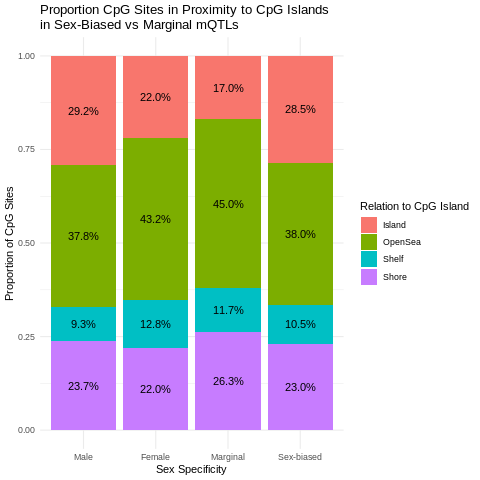

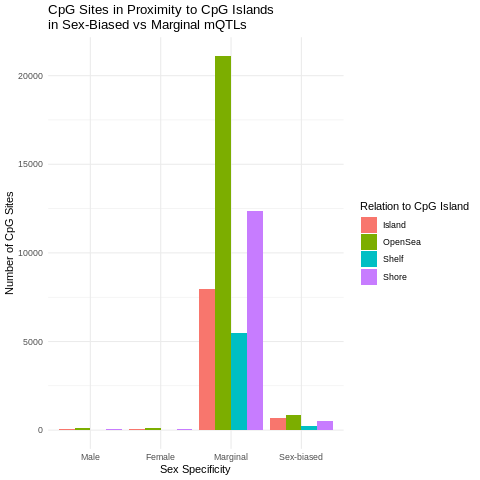

In [12]:
%%R -i  male_cpg -i female_cpg -i sex_cpg -i marginal_cpg
sex_cpg$Sex <- "Sex-biased"
marginal_cpg$Sex <- "Marginal"
female_cpg$Sex <- "Female"
male_cpg$Sex <- "Male"
sex_df_to_plot <- rbind(female_cpg,male_cpg,sex_cpg,marginal_cpg)%>% mutate(Relation_to_Island = gsub("N_|S_","",Relation_to_Island))
sex_df_to_plot$Sex <- factor(sex_df_to_plot$Sex, levels = c("Male","Female","Marginal","Sex-biased"))
sex_df_to_plot$Relation_to_Island <- factor(sex_df_to_plot$Relation_to_Island)
p <- ggplot(sex_df_to_plot, aes(Sex, fill = Relation_to_Island, by = Sex)) +
    geom_bar(position = "fill") +
    theme_minimal() +
    geom_text(stat = "prop", position = position_fill(0.5)) +
    labs(y = "Proportion of CpG Sites",x="Sex Specificity", fill = "Relation to CpG Island")+
    ggtitle("Proportion CpG Sites in Proximity to CpG Islands\nin Sex-Biased vs Marginal mQTLs")
    print(p)

p <- ggplot(sex_df_to_plot, aes(Sex, fill = Relation_to_Island, by = Sex)) +
    geom_bar(position = "dodge") +
    theme_minimal() +
    labs(y = "Number of CpG Sites",x="Sex Specificity", fill = "Relation to CpG Island")+
    ggtitle("CpG Sites in Proximity to CpG Islands\nin Sex-Biased vs Marginal mQTLs")
    print(p)

In [21]:
print(male_spec.shape)
print(male_spec.Probe.drop_duplicates().shape)
print(
    male_spec.UCSC_RefGene_Name.str.replace(";.*", "", regex=True)
    .drop_duplicates()
    .shape
)
print(female_spec.shape)
print(female_spec.Probe.drop_duplicates().shape)
print(
    female_spec.UCSC_RefGene_Name.str.replace(";.*", "", regex=True)
    .drop_duplicates()
    .shape
)

(2544, 49)
(312,)
(177,)
(1840, 49)
(227,)
(135,)


### GARFIELD

   ID PThresh       OR        Pvalue      Beta         SE CI95_lower CI95_upper
1:  1   1e-05 2.614229  1.076279e-85 0.9609693 0.04898299  0.8649627  1.0569760
2:  1   1e-08 2.577605  1.091202e-84 0.9468608 0.04855619  0.8516906  1.0420309
3:  2   1e-05 2.406349  2.342636e-93 0.8781106 0.04284325  0.7941378  0.9620834
4:  2   1e-08 2.493796 2.823181e-100 0.9138061 0.04298792  0.8295498  0.9980625
5:  3   1e-05 3.158386  9.234188e-77 1.1500610 0.06202024  1.0285014  1.2716207
6:  3   1e-08 2.998863  9.002769e-76 1.0982331 0.05962027  0.9813774  1.2150889
   NAnnotThesh NAnnot NThresh     N linkID             Annotation Celltype
1:        1763   2896   21732 91768      0 AG10803_footprints.txt  AG10803
2:        1478   2896   15323 91768      0 AG10803_footprints.txt  AG10803
3:        2246   3827   21732 91768      1    AoAF_footprints.txt     AoAF
4:        1890   3827   15323 91768      1    AoAF_footprints.txt     AoAF
5:        1243   1777   21732 91768      2   CD20+_footprints.txt

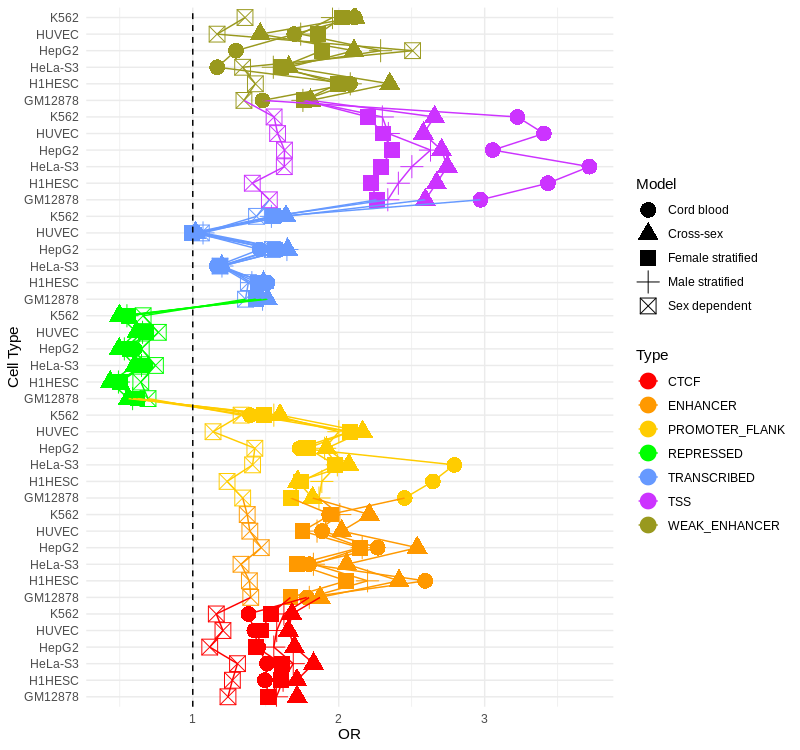

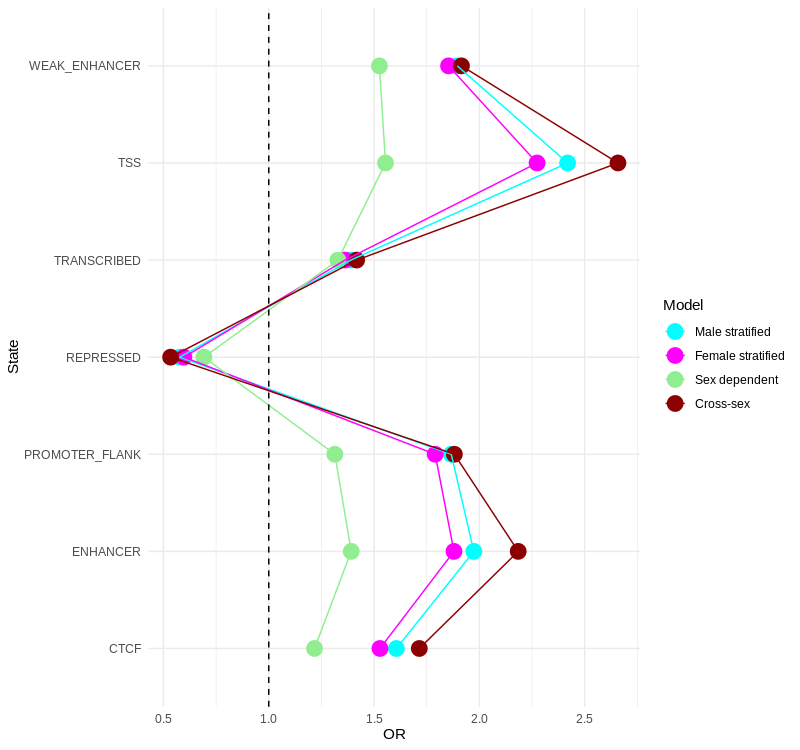

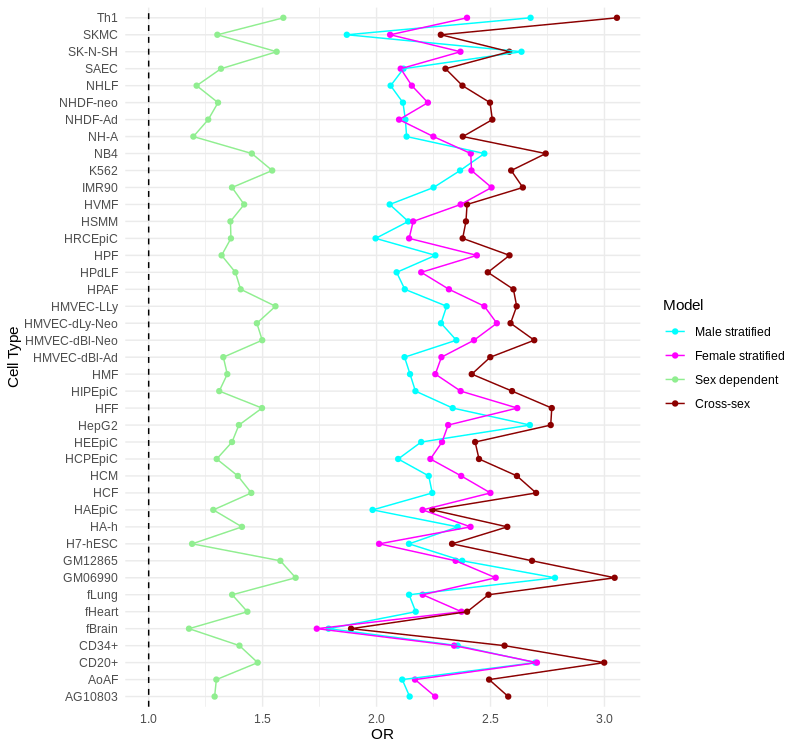

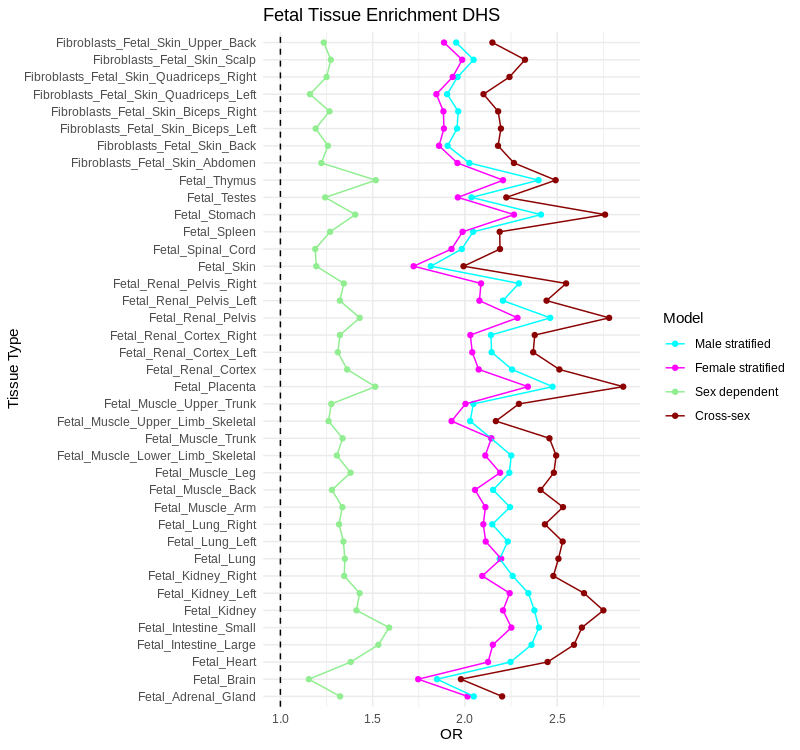

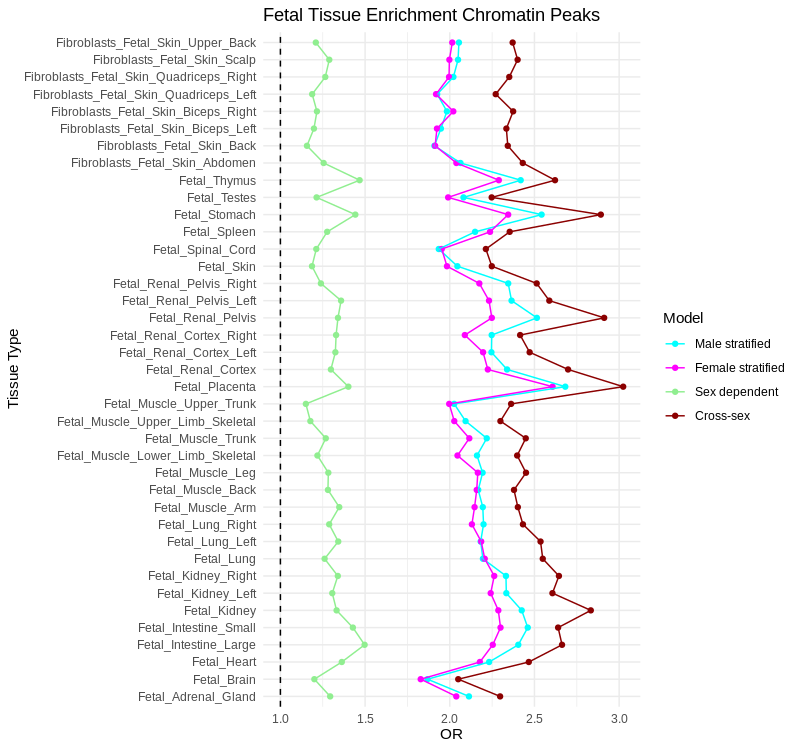

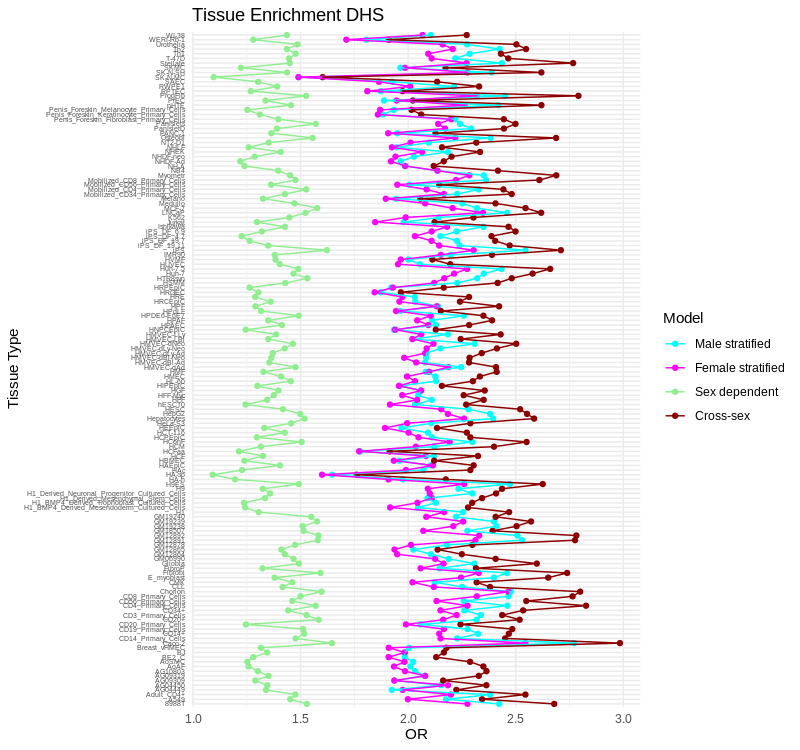

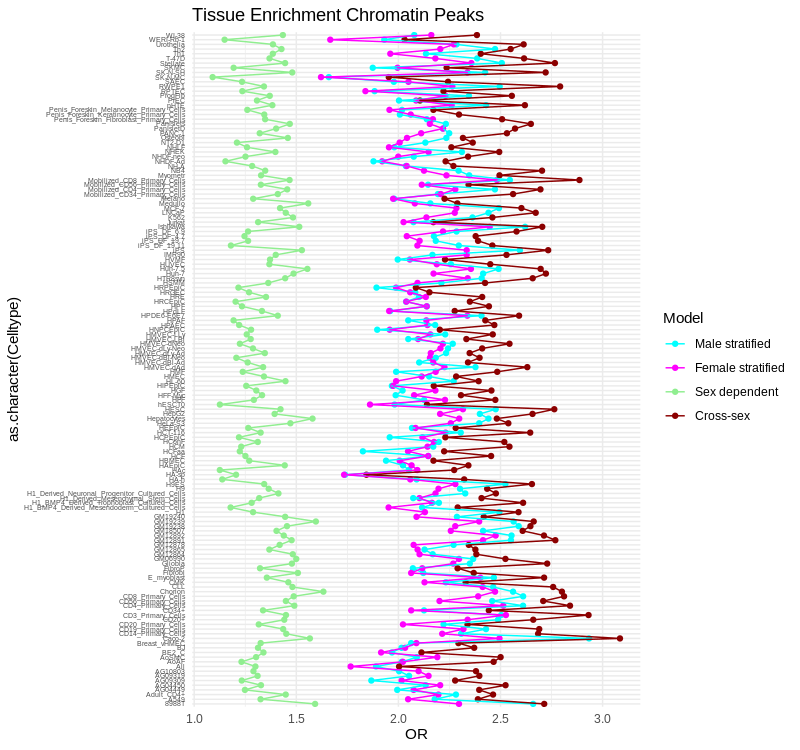

In [10]:
%%R -w 800 -h 750 -r 100
garfield_marginal <- fread("../../1kg_ld_data/output/mqtl_delahaye_richs_meta/garfield.test.mqtl_delahaye_richs_meta.out")
garfield_male <- fread("../../1kg_ld_data/output/mqtl_delahaye_richs_male_meta/garfield.test.mqtl_delahaye_richs_male_meta.out")
garfield_female <- fread("../../1kg_ld_data/output/mqtl_delahaye_richs_female_meta/garfield.test.mqtl_delahaye_richs_female_meta.out")

garfield_sex <- fread("../../1kg_ld_data/output/mqtl_delahaye_richs_sex_meta/garfield.test.mqtl_delahaye_richs_sex_meta.out")
garfield_cord <- fread("../../1kg_ld_data/output/mqtl_aries_cord/garfield.test.mqtl_aries_cord.out")
garfield_sex$Model = "Sex dependent"
garfield_male$Model <- "Male stratified"
garfield_female$Model <- "Female stratified"
garfield_marginal$Model = "Cross-sex"
garfield_cord$Model = "Cord blood"
garfield <- rbindlist(list(garfield_male,garfield_female,garfield_sex,garfield_marginal,garfield_cord))[Category == "Chromatin_States" & PThresh == 1e-8] 
print(head(garfield_marginal))
p <- ggplot(garfield, aes(as.character(ID),OR,color=Type,shape = Model, group = Model)) +
    geom_point(position = "identity", stat="identity",size = 5) +
    geom_line()+
    geom_hline(linetype="dashed", yintercept=1) +
    labs(x="Cell Type")+
    scale_color_ucscgb() + 
    coord_flip() + 
    theme_minimal() +
    scale_x_discrete(labels=garfield$Celltype)+
    theme(strip.text.y = element_text(size=30))
print(p)
garfield <- garfield[,.(OR=mean(OR)),by=c("Model","Type")]
garfield$Model <- factor(garfield$Model,levels=c("Male stratified", "Female stratified","Sex dependent","Cross-sex", "Cord blood"))
p <- ggplot(garfield[Model != "Cord blood"], aes(Type,OR,color=Model,group=Model)) +
    geom_point(size=5)+
    geom_line() + 
    coord_flip() +
    geom_hline(linetype="dashed", yintercept=1) +
    theme_minimal() +
    labs(x="State")+
    scale_color_manual(values=c("cyan","magenta", "light green", "dark red","red"))+
    theme(strip.text.y = element_text(size=30))
print(p)

garfield <- rbindlist(list(garfield_male,garfield_female,garfield_sex,garfield_marginal,garfield_cord))[Category == "Footprints" & PThresh == 1e-8] 
garfield$Model <- factor(garfield$Model,levels=c("Male stratified", "Female stratified","Sex dependent","Cross-sex", "Cord blood"))
p <- ggplot(garfield[Model != "Cord blood"], aes(as.character(Celltype),OR,color=Model, group=Model)) +
    geom_point(position = "identity", stat="identity") +
    geom_line()+
    geom_hline(linetype="dashed", yintercept=1) + 
    labs(x="Cell Type")+
    scale_color_manual(values=c("cyan","magenta", "light green", "dark red","red"))+
    coord_flip() + 
    theme_minimal() +
    theme(strip.text.y = element_text(size=30))
print(p)
garfield <- rbindlist(list(garfield_male,garfield_female,garfield_sex,garfield_marginal,garfield_cord))[Category == "Hotspots"& grepl("fetal|Fetal",as.character(Celltype))& PThresh == 1e-8] 
garfield$Model <- factor(garfield$Model,levels=c("Male stratified", "Female stratified","Sex dependent","Cross-sex", "Cord blood"))
p <- ggplot(garfield[Model != "Cord blood"][,.(OR=max(OR)),by=.(Model,Celltype)], aes(as.character(Celltype),OR,color=Model, group=Model)) +
    geom_point(position = "identity", stat="identity") +
    geom_line()+
    geom_hline(linetype="dashed", yintercept=1) +
    scale_color_manual(values=c("cyan","magenta", "light green", "dark red","red"))+
    labs(x="Tissue Type")+
    coord_flip() + 
    theme_minimal() +
    theme(strip.text.y = element_text(size=30))+
    ggtitle("Fetal Tissue Enrichment DHS")
print(garfield[Model != "Cord blood"][,.(OR=max(OR)),by=.(Model,Celltype)][,.(mean(OR)),by="Model"])
print(garfield[Model != "Cord blood"][,.(OR=max(OR)),by=.(Model,Celltype)][grepl("Placenta",Celltype)])
print(p)
garfield <- rbindlist(list(garfield_male,garfield_female,garfield_sex,garfield_marginal,garfield_cord))[Category == "Peaks" & grepl("fetal|Fetal",as.character(Celltype))& PThresh == 1e-8] 
garfield$Model <- factor(garfield$Model,levels=c("Male stratified", "Female stratified","Sex dependent","Cross-sex", "Cord blood"))
p <- ggplot(garfield[Model != "Cord blood"][,.(OR=max(OR)),by=.(Model,Celltype)], aes(as.character(Celltype),OR,color=Model, group=Model)) +
    geom_point(position = "identity", stat="identity") +
    geom_line()+
    geom_hline(linetype="dashed", yintercept=1) +
    scale_color_manual(values=c("cyan","magenta", "light green", "dark red","red"))+
    coord_flip() + 
    labs(x="Tissue Type")+
    theme_minimal() +
    theme(strip.text.y = element_text(size=30))+
    ggtitle("Fetal Tissue Enrichment Chromatin Peaks")
print(p)


library(RColorBrewer)
# Define the number of colors you want

garfield <- rbindlist(list(garfield_male,garfield_female,garfield_sex,garfield_marginal,garfield_cord))[Category == "Hotspots"& !grepl("fetal|Fetal",as.character(Celltype))& PThresh == 1e-8]
garfield$Model <- factor(garfield$Model,levels=c("Male stratified", "Female stratified","Sex dependent","Cross-sex", "Cord blood"))
p <- ggplot(garfield[Model != "Cord blood"][,.(OR=max(OR)),by=.(Model,Celltype)], aes(as.character(Celltype),OR,color=Model, group=Model)) +
    geom_point(position = "identity", stat="identity") +
    geom_line()+
    scale_color_manual(values=c("cyan","magenta", "light green", "dark red","red"))+
    coord_flip() + 
    theme_minimal() +
    labs(x="Tissue Type")+
    theme(strip.text.y = element_text(size=30),axis.text.y=element_text(size=5))+
    ggtitle("Tissue Enrichment DHS")
print(garfield[Model != "Cord blood"][,.(OR=max(OR)),by=.(Model,Celltype)][,.(mean(OR)),by="Model"])
    
print(p)
garfield <- rbindlist(list(garfield_male,garfield_female,garfield_sex,garfield_marginal,garfield_cord))[Category == "Peaks" & !grepl("fetal|Fetal",as.character(Celltype))& PThresh == 1e-8] 
garfield$Model <- factor(garfield$Model,levels=c("Male stratified", "Female stratified","Sex dependent","Cross-sex", "Cord blood"))

p <- ggplot(garfield[Model != "Cord blood"][,.(OR=max(OR)),by=.(Model,Celltype)], aes(as.character(Celltype),OR,color=Model, group=Model)) +
    geom_point(position = "identity", stat="identity") +
    geom_line()+
    scale_color_manual(values=c("cyan","magenta", "light green", "dark red","red"))+
    coord_flip() + 
    theme_minimal() +
    theme(strip.text.y = element_text(size=30),axis.text.y=element_text(size=5))+
    ggtitle("Tissue Enrichment Chromatin Peaks")
print(p)
